# Membros:
Ana Clara Cavalcante 11797000

Bruna Bazaluk M Videira 9797002

Thales Gomes 9814265

Link do Drive: https://drive.google.com/drive/u/2/folders/0AFr5m3SYFqBxUk9PVA

Link do GitHub: https://github.com/brunabazaluk/visaoComp

#EP2.1 Data augmentation

##Descrição do EP

Cada grupo deve criar um JN contendo funções para fazer data augmentation do dataset do EP1. Mais informações sobre Data Augmentation são encontradas aqui:

https://github.com/aleju/imgaug

https://www.kaggle.com/parulpandey/overview-of-popular-image-augmentation-packages

As funções de data augmentation serão aplicadas a imagens em níveis de cinza. Portanto, o dataset original precisará ser convertido para níveis de cinza. Deve-se criar 5 funções de data augmentation. Cada função será aplicada a cada imagem do dataset do EP1. Assim, o augmentedDataset terá 5X o tamanho do original. Cada grupo deve implementar as seguintes funções de data augmentation:

- RGB2gray (ie converter as imagens RGB originais em níveis de cinza)
- Soma de fundo com gradiente de níveis de cinza
- Logaritmo da imagem
- Exponencial da imagem
- Filtro da média implementado usando convolução
- Deve-se usar as funções do EP1 para visualização dos resultados do augmentedDataSet.

**EP2.2: Normalização e análise da variação das classes**

Deve-se criar um JN que realize a normalização das imagens de cada classe do augmentedDataSet. Deve-se usar a equalização de histogramas como função inicial de normalização, gerando um normalizedDataset. As funções de análise de cada classe abaixo devem ser aplicadas ao originalGrayDataset, augmentedDataset e normalizedDataset. Assim, esse JN deve calcular e mostrar para cada dataset:

- Protótipo médio de cada classe
- Histograma médio de cada classe
- Variância do histograma de cada classe

# Primeira parte do EP2

##Instalando as libs


In [ ]:
import numpy as np
from skimage.color import rgb2gray
from skimage import io
import os
from scipy.signal import convolve2d

# Conectar-se ao Drive
from google.colab import drive

import math
import matplotlib.pyplot as plt


In [ ]:
drive.mount('/content/drive')

Definindo os caminhos das pastas

In [ ]:
caminho_fotos = r'drive/Shareddrives/Visão Computacional 2021/Imagens_Originais' # Caminho das fotos ORIGINAIS
caminho_fotos_cinza = r'drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza'
caminho_fotos_log = r'drive/Shareddrives/Visão Computacional 2021/Imagens_Log'
caminho_fotos_exp = r'drive/Shareddrives/Visão Computacional 2021/Imagens_Exp'
caminho_fotos_media = r'drive/Shareddrives/Visão Computacional 2021/Imagens_Media'
caminho_fotos_gradiente = r'drive/Shareddrives/Visão Computacional 2021/Imagens_Gradiente'

##Funções

####Auxiliares

In [ ]:
def add_suffix(base_name, suffix):  # Para transformar os nomes das imagens
    """Recebe o nome do arquivo com uma extensão e retorna o nome + sufixo + extensão
    Ex:
    base_name = 'foto123.jpg'
    suffix = '-nova'
    Retorna -> 'foto123-nova.jpg' """
    nome, ext = os.path.splitext(base_name)
    return nome + suffix + ext

###RGB2gray (ie converter as imagens RGB originais em níveis de cinza)

In [ ]:
def convert_greyscale(caminho_fotos, caminho_salvar): # Recebe as fotos ORIGINAIS
    save_path_base = caminho_salvar
    for root, dirs, fotos in os.walk(caminho_fotos):
        for foto in fotos:
            img_path = os.path.join(caminho_fotos, foto)  # Ajusta o caminho
            # Processamento da imagem
            img = io.imread(img_path)  # Lê a imagem (transforma em matriz)
            img = rgb2gray(img)  # Aplica um filtro de escala de cinza
            img = (img * 255).astype(np.uint8)  # Converte para números inteiros positivos até 255
            # Salvamento
            novo_nome = add_suffix(foto, '-cinza')
            save_path = os.path.join(save_path_base, novo_nome)
            io.imsave(save_path, img)  # Salva a imagem convertida

In [ ]:
convert_greyscale(caminho_fotos, caminho_fotos_cinza)

###Soma de fundo com gradiente de níveis de cinza

A função gradient() implementa a soma da imagem com um gradiente de cinza, dado pela função:
r(x,y)=c * RAIZ((x−(w/2)) ** 2 + (y−(h/2)) ** 2)
Em que h, w são respestivamente a altura e largura são as dimensões da imagem e c é uma constante de normalização, que garante que 0≤r(x,y)≤255. A intensidade do nível de cinza de r(x,y) é proporcional à distância do centro do retângulo a (x,y).

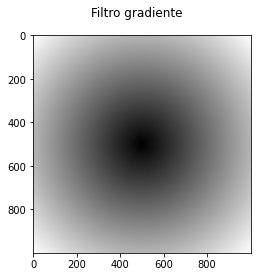

In [ ]:
class Filtro_Gradiente:
    def __init__(self, h, w):
        self.h = h
        self.w = w

    def distancia_ao_centro(self, x, y):
        maior_distancia = np.sqrt((self.w / 2.0) ** 2 + (self.h / 2.0) ** 2)
        return (255.0 / maior_distancia) * np.sqrt((x - self.w / 2.0) ** 2 + (y - self.h / 2.0) ** 2)

    def plot(self):
        x_range = np.arange(0, self.w, 1)
        y_range = np.arange(0, self.h, 1)

        graph = np.array([self.distancia_ao_centro(i, y_range) for i in x_range])
        plt.imshow(graph, cmap='gray', vmin=0, vmax=255)
        plt.suptitle('Filtro gradiente')
        plt.show()

grafico_grad = Filtro_Gradiente(1000, 1000)
grafico_grad.plot()

In [ ]:
def gradient(img):

    height, width = img.shape # Altura e largura da imagem
    d = Filtro_Gradiente(height, width)
    grad = np.fromfunction(d.distancia_ao_centro, img.shape)
    filtro = ((img + grad) / 2.0)
    filtro = filtro.astype(np.uint8)
    return filtro

def grad_image(caminho_fotos_cinzas, caminho_salva): # Recebe as fotos CINZAS

    save_path_base = caminho_salva
    for root, dirs, fotos in os.walk(caminho_fotos_cinzas):
        for foto in fotos:
            img_path = os.path.join(caminho_fotos_cinzas, foto)  # Ajusta o caminho
            # Processamento da imagem
            img = io.imread(img_path)  # Lê a imagem (transforma em matriz)
            gradiente = gradient(img)
            # Salvamento
            novo_nome = add_suffix(foto, '-grad')
            save_path = os.path.join(save_path_base, novo_nome)
            io.imsave(save_path, gradiente)  # Salva a imagem convertida

In [ ]:
grad_image(caminho_fotos_cinza, caminho_fotos_gradiente)

###Logaritmo da imagem

In [ ]:
def log_image(caminho_fotos_cinzas, caminho_salvar): # Recebe as fotos CINZAS
    save_path_base = caminho_salvar
    for root, dirs, fotos in os.walk(caminho_fotos_cinzas):
        for foto in fotos:
            img_path = os.path.join(caminho_fotos_cinzas, foto)  # Ajusta o caminho
            # Processamento da imagem
            img = io.imread(img_path)  # Lê a imagem (transforma em matriz)
            img = np.where(img == 0, 1, img)  # Transforma os 0 em 1 para ser possível calcular o log
            c = 255 / np.log(1 + np.max(img))
            log_img = c * np.log(img)
            log_img = log_img.astype(np.uint8)
            # Salvamento
            novo_nome = add_suffix(foto, '-log')
            save_path = os.path.join(save_path_base, novo_nome)
            io.imsave(save_path, log_img)  # Salva a imagem convertida

In [ ]:
log_image(caminho_fotos_cinza, caminho_fotos_log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: drive/Shareddrives/Visão Computacional 2021/Imagens_Log/nd_lego1_f3-cinza-log.jpg is a low contrast image
  from ipykernel import kernelapp as app


###Exponencial da imagem

In [ ]:
def exp_image(caminho_fotos_cinzas, caminho_salvar): # Recebe as fotos CINZAS
    save_path_base = caminho_salvar
    for root, dirs, fotos in os.walk(caminho_fotos_cinzas):
        for foto in fotos:
            img_path = os.path.join(caminho_fotos_cinzas, foto)  # Ajusta o caminho
            # Processamento da imagem
            img = io.imread(img_path)  # Lê a imagem (transforma em matriz)

            c = 0.0217  # Valor para y = 255 e x = 255
            exp_img = np.exp(c * img) - 1
            exp_img = exp_img.astype(np.uint8)
            # Salvamento
            novo_nome = add_suffix(foto, '-exp')
            save_path = os.path.join(save_path_base, novo_nome)
            io.imsave(save_path, exp_img)  # Salva a imagem convertida

In [ ]:
exp_image(caminho_fotos_cinza, caminho_fotos_exp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: drive/Shareddrives/Visão Computacional 2021/Imagens_Exp/nd_lego2_f1-cinza-exp.jpg is a low contrast image
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: drive/Shareddrives/Visão Computacional 2021/Imagens_Exp/nf_palheta3_f3-cinza-exp.jpg is a low contrast image
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: drive/Shareddrives/Visão Computacional 2021/Imagens_Exp/nf_pregador2_f1-cinza-exp.jpg is a low contrast image
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: drive/Shareddrives/Visão Computacional 2021/Imagens_Exp/nf_vela1_f2-cinza-exp.jpg is a low contrast image
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: drive/Shareddri

###Filtro da média implementado usando convolução

In [ ]:
def mean_filter(caminho_fotos_cinzas, caminho_salvar): # Recebe as fotos CINZAS
    """
    Para cada ponto (salvo as bordas) haverá 8 pontos vizinhos, conforme matriz:
    P1        P2        P3
    P4       PONTO      P6
    P7        P8        P9
    Dessa forma, o filtro da média se baseará na média dos valores rgb de cada ponto
    Portanto, cada ponto da região terá peso de 1/9
    """

    save_path_base = caminho_salvar
    for root, dirs, fotos in os.walk(caminho_fotos_cinzas):
      for foto in fotos:
          img_path = os.path.join(caminho_fotos_cinzas, foto)  # Ajusta o caminho
          img = io.imread(img_path)
          # Processamento da imagem
          kernel = np.full(shape=(3, 3), fill_value=1/9)
          mean_filter_image = convolve2d(img, kernel, mode='same')  # 'same' garante que o tamanho da imagem seja mantido
          mean_filter_image = mean_filter_image.astype(np.uint8)
          # Salvamento
          novo_nome = add_suffix(foto, '-media')
          save_path = os.path.join(save_path_base, novo_nome)
          io.imsave(save_path, mean_filter_image)

In [ ]:
mean_filter(caminho_fotos_cinza, caminho_fotos_media)

drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza/nd_faca1_f4-cinza.jpg
drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza/df_pregador1_f1-cinza.jpg
drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza/nf_maca3_f3-cinza.jpg
drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza/df_lego1_f3-cinza.jpg
drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza/nd_vela3_f3-cinza.jpg
drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza/df_palheta2_f1-cinza.jpg
drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza/nf_faca1_f5-cinza.jpg
drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza/df_caneta1_f4-cinza.jpg
drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza/nd_maca2_f3-cinza.jpg
drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza/df_tesoura3_f5-cinza.jpg
drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza/dd_faca3_f4-cinza.jpg
drive/Shareddrives/Visão Computacional 2021/Imagens_Cinza/nd_lego4_f1-cinza.jpg
drive/Shareddrives/Visão Com

##Vizualizando as imagens

In [ ]:
paths = [caminho_fotos_cinza, caminho_fotos_gradiente, caminho_fotos_exp, caminho_fotos_log, caminho_fotos_media]

In [ ]:
def show_images(paths):

  print('COLUNAS')
  print('Cinza - Gradiente - Exponencial - Log - Média')
  n_linhas = 5
  n_colunas = len(paths)
  fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(20, 20))
  num_fotos = n_colunas * n_linhas

  for n, path in enumerate(paths):
    for root, dir, files in os.walk(path):
      for pos, foto in enumerate(files):
          if pos == n_linhas:
            break
          
          full_path = os.path.join(path, foto)
          f = io.imread(full_path)
          
          axs[pos, n].imshow(f, cmap="gray")
          axs[pos, n].axis('off')

  plt.tight_layout()
  plt.show()
  

COLUNAS
Cinza - Gradiente - Exponencial - Log - Média


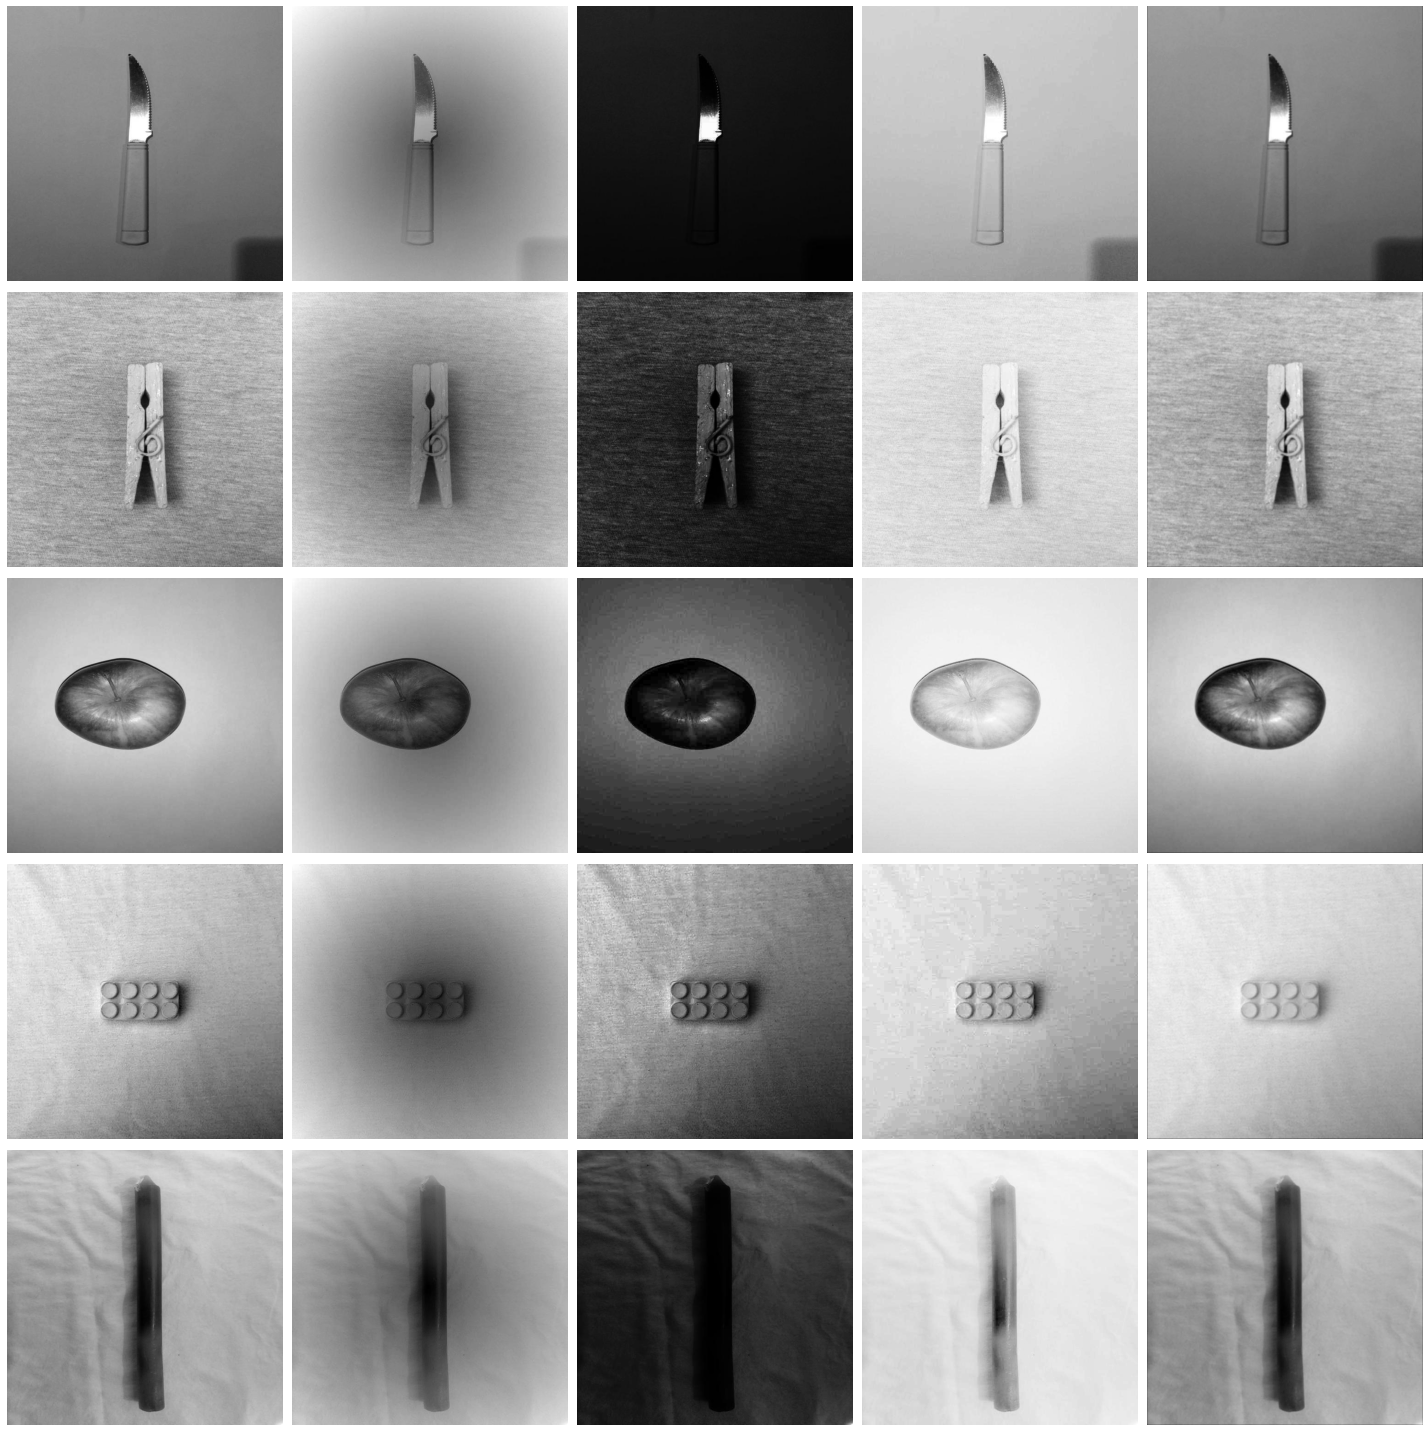

In [ ]:
show_images(paths)